In [10]:
#Written by Graciana Puentes -Based on github by jcwang111 
#Increased precision and Nr of qubits in quantum circuit
#initialization
import matplotlib.pyplot as plt
import numpy as np
import math

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.visualization import plot_histogram, plot_bloch_vector
from qiskit.quantum_info import Statevector

# import basic plot tools
from qiskit.visualization import plot_histogram

In [11]:
# Preparation
import matplotlib.pyplot as plt
import numpy as np
from numpy import sqrt, sin, cos, pi, arccos
import scipy.integrate as integrate
import scipy.special as special

import math

from qiskit import IBMQ, Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.visualization import plot_histogram, plot_bloch_vector
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import RXGate

In [3]:
mu = 0
sigma = 1
k = 3
N = 3

mu_size = 1  # The number of qubits used to represent mu
sigma_size = 1  # The number of qubits used to represent sigma

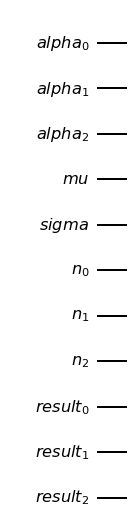

In [12]:
def binary_approx(n, k):
    """
    
    Input:
        n: real number between 0 and 1
        k: the number of bits use to approximate n
        
    Output: 
        a: a list such that the i-th element is 1 or 0
    """
    a = []
    total = 0
    for i in range(1, k+1):
        bit = 0
        if (n > total + 1/2**i): 
            bit = 1
        else:
            bit = 0
        a.append(bit)
        total += bit/2**i
    return (a, total)

alpha_register = QuantumRegister(k, 'alpha')

mu_register = QuantumRegister(mu_size, 'mu')
sigma_register = QuantumRegister(sigma_size, 'sigma')
N_register = QuantumRegister(N, 'n')
res_register = QuantumRegister(N, 'result')

qc = QuantumCircuit(alpha_register, mu_register, sigma_register, N_register, res_register)
qc.draw()

In [13]:
def f(mu, sigma, n):
    return np.sum(np.exp((-(np.arange(-n, n+1, 1) - mu)**2)/float(sigma**2)))

def angle(mu, sigma, n=1000):
    return np.arccos(math.sqrt(f(mu/2, sigma/2, n)/ f(mu, sigma, n)))

# Example code to verify correctness
alpha = angle(mu, sigma)/(np.pi*2)
precision = 9

(alpha_binary, alpha_approx) = binary_approx(alpha, precision)

print(alpha)
print(alpha_approx)
print(alpha_binary)

0.11143872044136584
0.111328125
[0, 0, 0, 1, 1, 1, 0, 0, 1]


In [14]:
def KWA(mu, sigma, k, N):
    """
    Kitaev-Webb Algorithm to construct the prepare the Gaussian wavefunction
    Parameters:
        - mu: mean
        - sigma: sd
        - k: 
    """

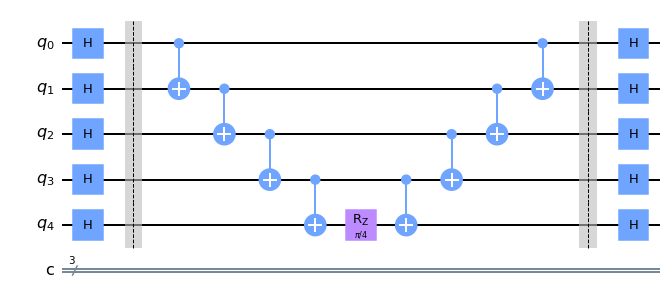

In [15]:
qc = QuantumCircuit(5, 3)
# qc.x(3)

for qubit in range(5):
    qc.h(qubit)

qc.barrier() 

qc.cnot(0, 1)
qc.cnot(1, 2)
qc.cnot(2, 3)
qc.cnot(3, 4)
qc.rz(math.pi/4, 4)
qc.cnot(3,4)
qc.cnot(2,3)
qc.cnot(1,2)
qc.cnot(0,1)

qc.barrier() 

for qubit in range(5):
    qc.h(qubit)

qc.draw('mpl')

In [16]:
backend = Aer.get_backend('statevector_simulator') # Tell Qiskit how to simulate our circuit

state = execute(qc, backend).result().get_statevector()
print("Qubit State = " + str(state))

Qubit State = Statevector([ 9.23879533e-01-2.96095076e-16j,
             -3.12252208e-18+4.73817313e-17j,
              6.32141179e-19+6.24940220e-17j,
             -8.02728890e-18-1.67519718e-17j,
             -6.59196903e-18+6.24940220e-17j,
             -8.02728890e-18-8.55891700e-33j,
             -1.21941298e-17+2.45326947e-18j,
             -1.04083409e-17-1.96261557e-17j,
             -2.88070924e-17+6.24940220e-17j,
             -8.02728890e-18-6.79253632e-33j,
             -1.21941298e-17+2.45326947e-18j,
             -1.04083409e-17+2.87418396e-18j,
             -1.14967359e-17+2.45326947e-18j,
             -1.04083409e-17-5.74836793e-18j,
             -9.81307787e-18-5.08088743e-18j,
              1.30242612e-17-3.99094222e-17j,
              2.11636066e-17+6.59634690e-17j,
             -1.08839500e-18+9.81307787e-18j,
              7.43202591e-18+5.92271642e-18j,
             -3.46944695e-18+2.87418396e-18j,
             -1.14967359e-17+5.92271642e-18j,
             -3.4694